In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# Carregar dados
df = pd.read_csv("cereal.csv")
print(df.shape)
df.head()

(77, 16)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [20]:
# 3. Informações iniciais
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [21]:
# 4. Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [22]:
# 5. Análise da estrutura das variáveis
# Variável dependente: rating
# Variáveis independentes: todas as outras exceto "name"
df.drop('name', axis=1, inplace=True)

# Codificar variáveis categóricas: mfr (fabricante) e type (hot/cold)
le = LabelEncoder()
df['mfr'] = le.fit_transform(df['mfr'])
df['type'] = le.fit_transform(df['type'])

# Confirmar a codificação
df.head()


,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,6,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


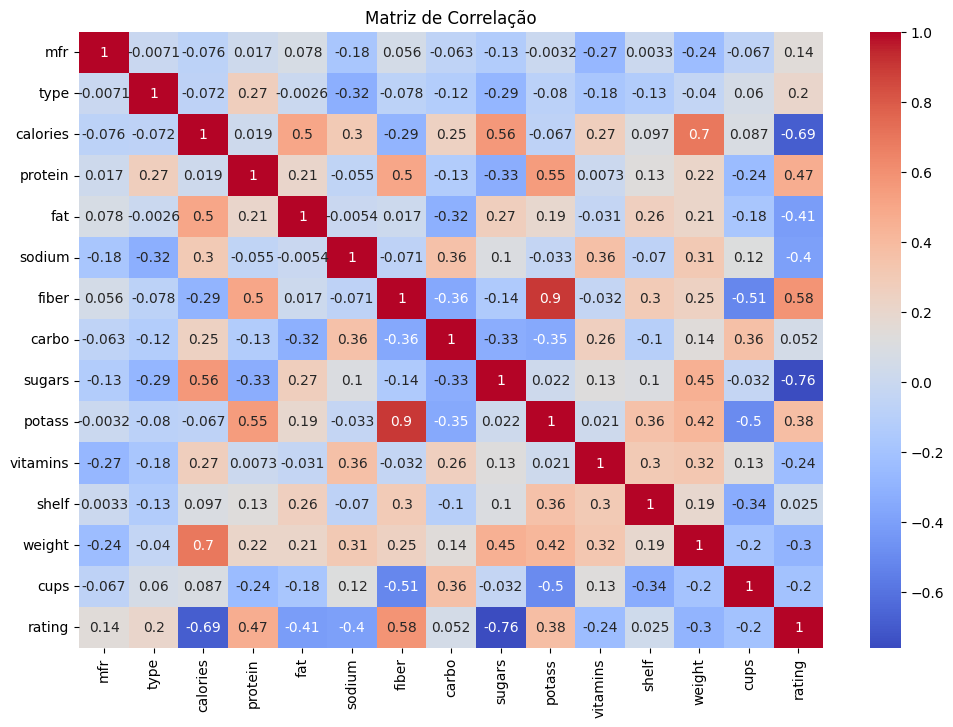

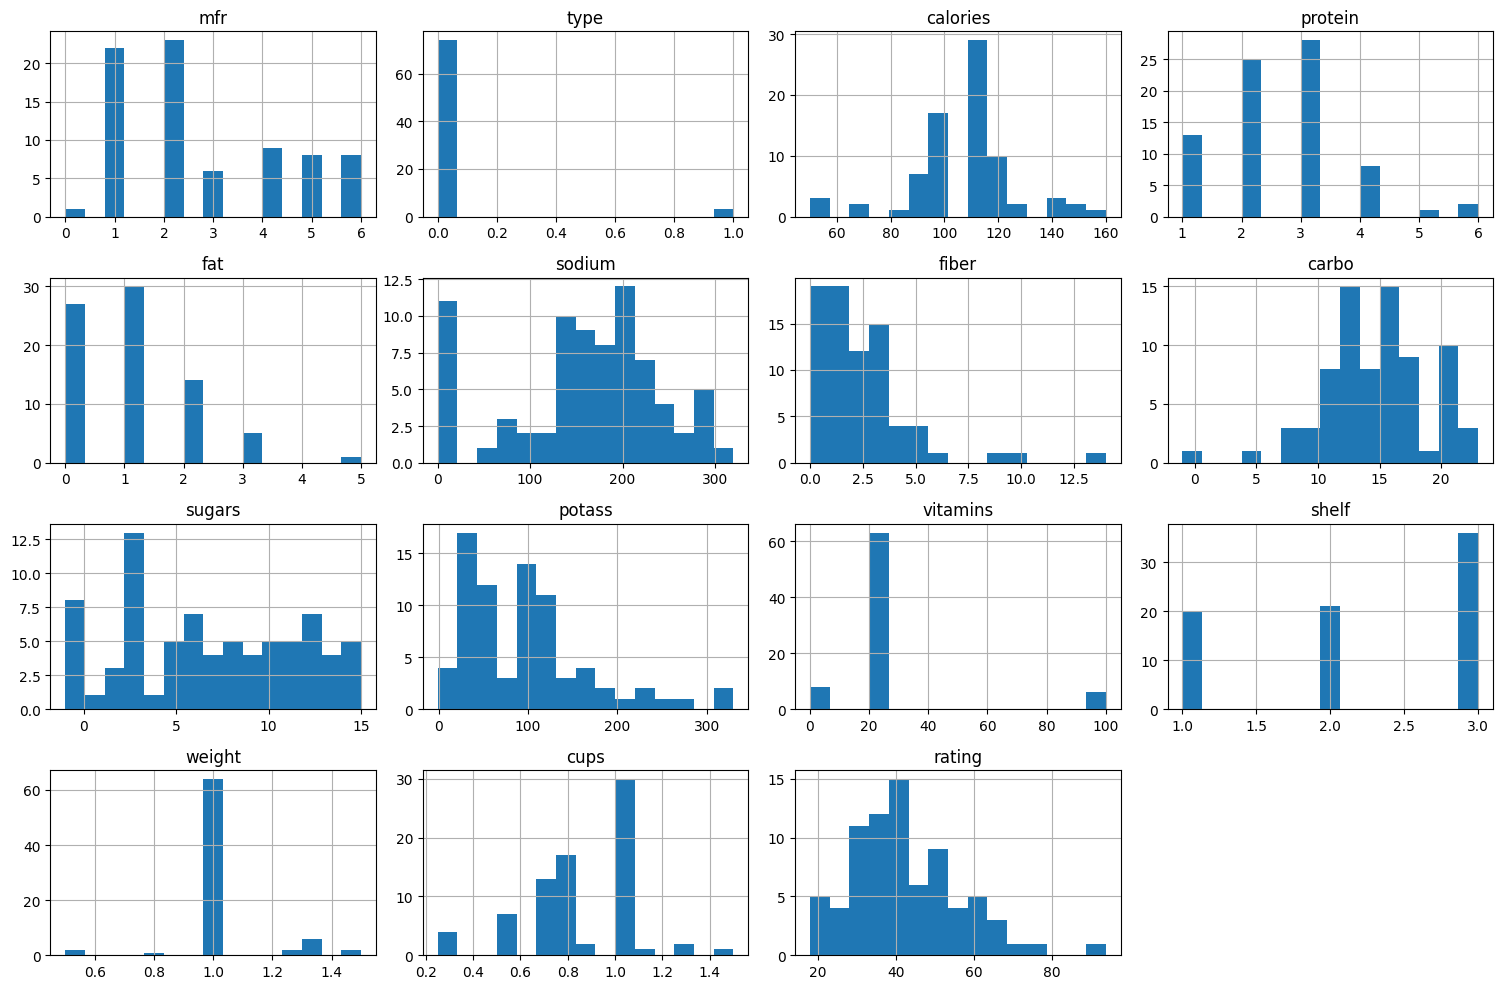

In [23]:
# 6. Visualização dos dados

# Correlação entre variáveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Histogramas das variáveis numéricas
df.hist(figsize=(15,10), bins=15)
plt.tight_layout()
plt.show()


In [24]:
# 7. Preparar dados para modelagem preditiva

# Definir X e y
X = df.drop('rating', axis=1)
y = df['rating']

# Normalizar as variáveis independentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
# 8. Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

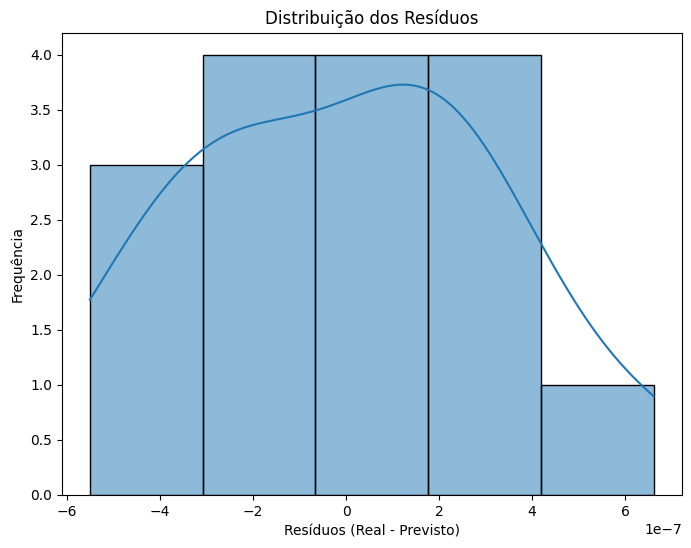

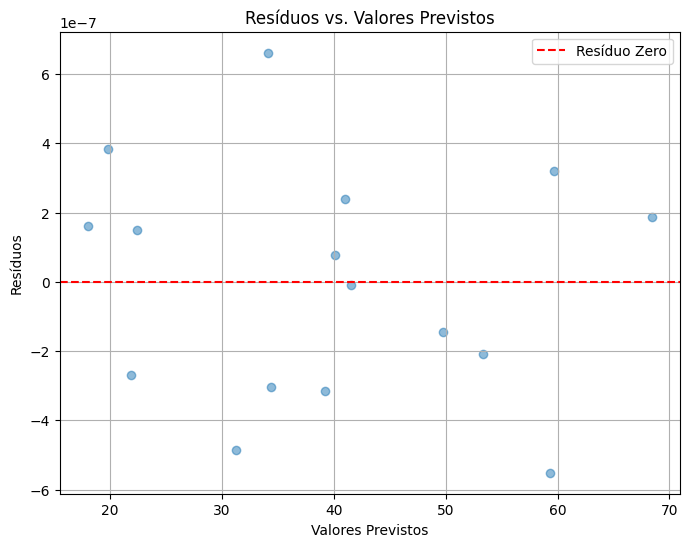

In [26]:
# Calculate the residuals
residuals = y_test - y_pred_lr

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos (Real - Previsto)')
plt.ylabel('Frequência')
plt.show()

# Plot residuals against predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', label='Resíduo Zero')
plt.title('Resíduos vs. Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# 9. Árvore de Decisão
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Exibir os coeficientes e o intercepto do modelo de Regressão Linear
print("Coeficientes do Modelo de Regressão Linear:")
print(lr.coef_)
print("\nIntercepto do Modelo de Regressão Linear:")
print(lr.intercept_)

Coeficientes do Modelo de Regressão Linear:
[ 4.18952632e-08 -2.69541180e-08 -4.31131300e+00  3.56009208e+00
 -1.69126535e+00 -4.53848744e+00  8.15359883e+00  4.64409639e+00
 -3.20108488e+00 -2.40749071e+00 -1.13675037e+00 -4.55668460e-08
  5.88986175e-08  2.40794590e-08]

Intercepto do Modelo de Regressão Linear:
42.6657049883281


In [29]:
# 10. Avaliação dos modelos

def avaliar_modelo(nome, y_true, y_pred):
    print(f"Modelo: {nome}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("-"*30)

avaliar_modelo("Regressão Linear", y_test, y_pred_lr)
avaliar_modelo("Árvore de Decisão", y_test, y_pred_tree)


Modelo: Regressão Linear
MAE: 2.7904524024791044e-07
MSE: 1.0634371884457123e-13
RMSE: 3.2610384671845135e-07
R2 Score: 0.9999999999999996
------------------------------
Modelo: Árvore de Decisão
MAE: 4.9445445
MSE: 34.932481925166755
RMSE: 5.910370709622769
R2 Score: 0.8409667949251617
------------------------------
